In [56]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

In [57]:
csvpath='merged_file.csv'
election=pd.read_csv(csvpath)
election.head()
election["% GOP"]=election["GOP %"]*100
election.head()

,Unnamed: 0,State,State Abbr,County,DEM Votes,GOP Votes,Total Votes,DEM %,GOP %,Total Population,...,Education (Masters),Education (Professional),Education (Doctorate),Median Income,Income Per Capita,Median Home Value,Pop in Labor Force,Pop Not in Labor Force,Unemployed,% GOP
0,0,Indiana,IN,Adams County,2802,9642,13039,0.214894,0.739474,34813.0,...,768.0,126.0,64.0,47572.0,21173.0,114600.0,15975.0,8948.0,872.0,73.947389
1,1,Indiana,IN,Allen County,55222,83801,145787,0.378785,0.574818,365565.0,...,16367.0,4152.0,1694.0,49574.0,26058.0,116400.0,186706.0,93216.0,13152.0,57.481806
2,2,Indiana,IN,Bartholomew County,9841,20637,32389,0.303838,0.637161,80203.0,...,5255.0,499.0,632.0,55874.0,28631.0,137500.0,41710.0,21169.0,2165.0,63.716076
3,3,Indiana,IN,Benton County,860,2579,3654,0.235359,0.705802,8709.0,...,188.0,42.0,12.0,48069.0,23181.0,81500.0,4368.0,2364.0,201.0,70.580186
4,4,Indiana,IN,Blackford County,1243,3349,4822,0.257777,0.694525,12364.0,...,315.0,51.0,42.0,38791.0,21980.0,67100.0,5763.0,4263.0,480.0,69.452509


In [58]:
#election.dtypes

In [59]:
a=0
b=0
def LinearRegression(x,y):
    # Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
    #Calculate the linear regression values to be plotted against weight
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    #plot the regression values to form the regression line
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,(a,b),fontsize=15,color="red");
    
    print(f"The r-squared is: {rvalue}")
    print(line_eq)

In [60]:
age_thirty=election.loc[(election["Median Age"]>33)&(election["Median Age"]<35)]
age_thirty.head()
x_marion=age_thirty["Median Age"][48]
y_marion=age_thirty["% GOP"][48]
age_thirty.head()
x_daviess=age_thirty["Median Age"][13]
y_daviess=age_thirty["% GOP"][13]

The r-squared is: 0.4850040167794374
y = 0.01x + 0.14


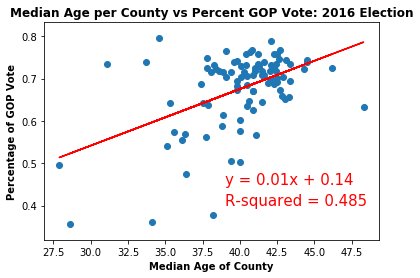

In [61]:
#create a scatterplot for median age vs %Republican vote
plt.scatter(election["Median Age"],election["GOP %"])#,s=election["Total Population"]*10, alpha=0.5);
#plt.scatter(x, y, s=z*1000, alpha=0.5)
plt.xlabel("Median Age of County",weight="bold");
plt.ylabel("Percentage of GOP Vote",weight="bold");
plt.title("Median Age per County vs Percent GOP Vote: 2016 Election",weight="bold");

# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
#Calculate the linear regression values to be plotted against weight
(slope, intercept, rvalue, pvalue, stderr) = linregress(election["Median Age"],election["GOP %"])
regress_values = election["Median Age"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot the regression values to form the regression line
plt.plot(election["Median Age"],regress_values,"r-")
plt.annotate(line_eq,(39,0.45),fontsize=15,color="red");
plt.annotate(f"R-squared = {round(rvalue,3)}",(39,0.4),fontsize=15,color='red');

print(f"The r-squared is: {rvalue}")
print(line_eq)

#plt.annotate('Marion County',(x_marion,y_marion));
#plt.annotate('Daviess County',(x_daviess,y_daviess));

In [62]:
x=election["Median Age"].tolist()
y=election["GOP %"].tolist()
a=election["Total Population"].astype(float)
z=a.tolist()
pop_reduced=[]
for item in z:
    b=item/500
    pop_reduced.append(b)

In [63]:
tippecanoe=election.loc[election["County"]=="Tippecanoe County"]
x_tippecanoe=tippecanoe["Median Age"][78]
y_tippecanoe=tippecanoe["% GOP"][78]
monroe=election.loc[election["County"]=="Monroe County"]
x_monroe=monroe["Median Age"][52]
y_monroe=monroe["% GOP"][52]


The r-squared is: 0.4850040167794375
y = 1.34x + 14.08
0.49


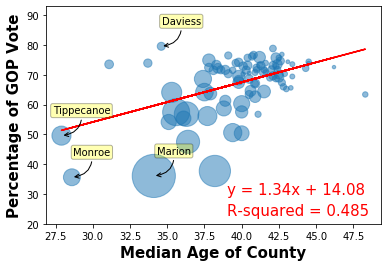

In [95]:
plt.scatter(election["Median Age"], election["% GOP"], s=pop_reduced*10000, alpha=0.5);

plt.xlabel("Median Age of County",weight="bold",fontsize=15);
plt.ylabel("Percentage of GOP Vote",weight="bold",fontsize=15);
#plt.title("Median Age per County vs Percent GOP Vote",weight="bold",fontsize=15);
plt.ylim(20,93);
plt.annotate('Marion', xy=(x_marion,y_marion), xytext=(20,20), 
            textcoords='offset points', ha='center', va='bottom',
            bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.3),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=-0.5', 
                            color='black'));

plt.annotate('Daviess', xy=(x_daviess,y_daviess), xytext=(20,20), 
            textcoords='offset points', ha='center', va='bottom',
            bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.3),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=-0.5', 
                            color='black'));

plt.annotate('Tippecanoe', xy=(x_tippecanoe,y_tippecanoe), xytext=(20,20), 
            textcoords='offset points', ha='center', va='bottom',
            bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.3),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=-0.5', 
                            color='black'));

plt.annotate('Monroe', xy=(x_monroe,y_monroe), xytext=(20,20), 
            textcoords='offset points', ha='center', va='bottom',
            bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.3),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=-0.5', 
                            color='black'));

a=39
b=30
LinearRegression(election["Median Age"],election["% GOP"])

#plt.annotate(line_eq,(39,0.45),fontsize=15,color="red");
plt.annotate(f"R-squared = {round(rvalue,3)}",(39,23),fontsize=15,color='red');

plt.savefig('median_age_GOP.png')

correlation = st.pearsonr(x,y)
print(round(correlation[0],2))

according to:
https://www.census.gov/newsroom/blogs/random-samplings/2017/05/voting_in_america.html![image.png](attachment:image.png)

**Voting Rates**

- 18-29 year olds: 46.1%
- 30-44 year olds: 58.7%
- 45-64 year olds: 66.6%
- 65 years and oldes: 70.9%



In [66]:
under_thirty=election.loc[election["Median Age"]<30]
under_thirty

,Unnamed: 0,State,State Abbr,County,DEM Votes,GOP Votes,Total Votes,DEM %,GOP %,Total Population,...,Education (Masters),Education (Professional),Education (Doctorate),Median Income,Income Per Capita,Median Home Value,Pop in Labor Force,Pop Not in Labor Force,Unemployed,% GOP
52,52,Indiana,IN,Monroe County,34183,20527,57623,0.593218,0.356229,143292.0,...,12266.0,1899.0,3772.0,43389.0,25488.0,161300.0,76130.0,46768.0,5034.0,35.622928
78,78,Indiana,IN,Tippecanoe County,27207,30711,61916,0.439418,0.496011,183397.0,...,10031.0,1590.0,3960.0,47406.0,24221.0,139500.0,94726.0,54661.0,5842.0,49.601072


In [67]:
late_thirties=election.loc[(election["Median Age"]>38)&(election["Median Age"]<40)]
#late_thirties

The r-squared is: -0.47952165837526367
y = -0.01x + 0.79


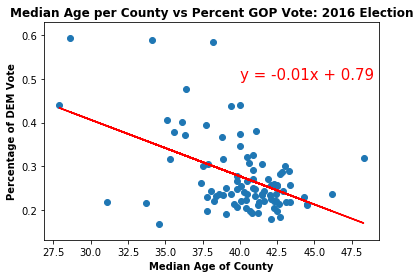

In [68]:
#create a scatterplot for median age vs %Republican vote
plt.scatter(election["Median Age"],election["DEM %"],marker="o");
plt.xlabel("Median Age of County",weight="bold");
plt.ylabel("Percentage of DEM Vote",weight="bold");
plt.title("Median Age per County vs Percent GOP Vote: 2016 Election",weight="bold");

a=40
b=0.5
LinearRegression(election["Median Age"],election["DEM %"])

The r-squared is: 0.4613527069665731
y = 0.01x + 0.2


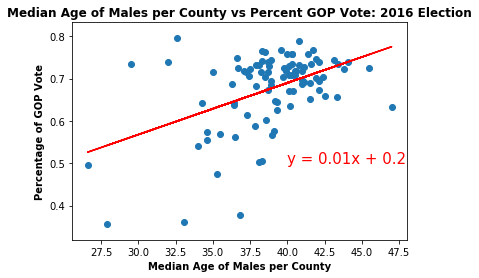

In [69]:
#create a scatterplot for median age vs %Republican vote
plt.scatter(election["Median Age (Male)"],election["GOP %"],marker="o");
plt.xlabel("Median Age of Males per County",weight="bold");
plt.ylabel("Percentage of GOP Vote",weight="bold");
plt.title("Median Age of Males per County vs Percent GOP Vote: 2016 Election",weight="bold");

a=40
b=0.5
LinearRegression(election["Median Age (Male)"],election["GOP %"])

The r-squared is: 0.4827949755082332
y = 0.01x + 0.11


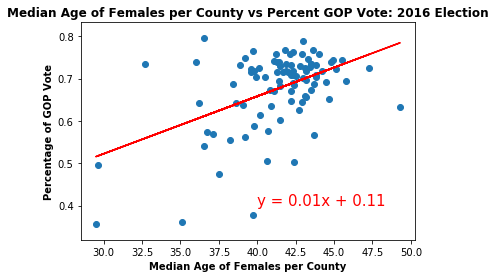

In [70]:
#create a scatterplot for median age vs %Republican vote
plt.scatter(election["Median Age (Female)"],election["GOP %"],marker="o");
plt.xlabel("Median Age of Females per County",weight="bold");
plt.ylabel("Percentage of GOP Vote",weight="bold");
plt.title("Median Age of Females per County vs Percent GOP Vote: 2016 Election",weight="bold");

a=40
b=0.4
LinearRegression(election["Median Age (Female)"],election["GOP %"])

The r-squared is: 0.931231133107027
y = 0.99x + -2.0


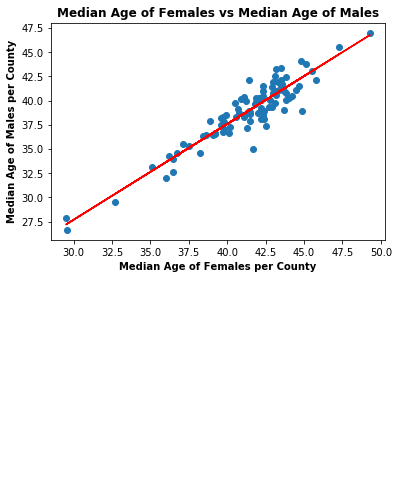

In [71]:
#Just Checking!!! :)
#create a scatterplot for Median Age of males vs median age females
plt.scatter(election["Median Age (Female)"],election["Median Age (Male)"],marker="o");
plt.xlabel("Median Age of Females per County",weight="bold");
plt.ylabel("Median Age of Males per County",weight="bold");
plt.title("Median Age of Females vs Median Age of Males",weight="bold");

a=40
b=0.5
LinearRegression(election["Median Age (Female)"],election["Median Age (Male)"])

In [72]:
path='indiana_pop_age.csv'
population_age=pd.read_csv(path)
population_age.columns

Index(['Unnamed: 0', 'County', 'Pop (18-19)', 'Pop (20)', 'Pop (21)',
       'Pop (22-24)', 'Pop (25-29)', 'Pop (30-34)', 'Pop (35-39)',
       'Pop (40-44)', 'Pop (45-49)', 'Pop (50-54)', 'Pop (55-59)',
       'Pop (60-61)', 'Pop (62-64)', 'Pop (65-66)', 'Pop (67-69)',
       'Pop (70-74)', 'Pop (75-79)', 'Pop (80-84)', 'Pop (85 and over)'],
      dtype='object')

In [73]:
population_age.head()

,Unnamed: 0,County,Pop (18-19),Pop (20),Pop (21),Pop (22-24),Pop (25-29),Pop (30-34),Pop (35-39),Pop (40-44),...,Pop (50-54),Pop (55-59),Pop (60-61),Pop (62-64),Pop (65-66),Pop (67-69),Pop (70-74),Pop (75-79),Pop (80-84),Pop (85 and over)
0,759,Adams County,780.0,490.0,535.0,1117.0,1904.0,2064.0,1864.0,1948.0,...,2100.0,2032.0,877.0,1119.0,687.0,868.0,1076.0,881.0,525.0,996.0
1,760,Allen County,9334.0,4671.0,5232.0,15024.0,24951.0,24079.0,23368.0,22458.0,...,24523.0,24219.0,8953.0,11838.0,7299.0,8902.0,11118.0,7948.0,5969.0,6697.0
2,761,Bartholomew County,1671.0,1035.0,804.0,3146.0,5761.0,5299.0,5000.0,5514.0,...,5308.0,5222.0,1790.0,2898.0,1873.0,2127.0,2941.0,2172.0,1500.0,1379.0
3,762,Benton County,184.0,64.0,105.0,319.0,460.0,509.0,437.0,560.0,...,671.0,653.0,222.0,310.0,166.0,249.0,391.0,277.0,157.0,177.0
4,763,Blackford County,285.0,114.0,120.0,448.0,698.0,640.0,588.0,800.0,...,918.0,901.0,324.0,591.0,395.0,391.0,580.0,511.0,289.0,284.0


In [74]:
population_age["Total Voting Population"]=population_age.iloc[:,2:21].sum(axis=1)
population_age["65 & older"]=population_age.iloc[:,15:21].sum(axis=1)
population_age["% 65 & older"]=(population_age["65 & older"]/population_age["Total Voting Population"])*100


In [75]:
population_age.head()

,Unnamed: 0,County,Pop (18-19),Pop (20),Pop (21),Pop (22-24),Pop (25-29),Pop (30-34),Pop (35-39),Pop (40-44),...,Pop (62-64),Pop (65-66),Pop (67-69),Pop (70-74),Pop (75-79),Pop (80-84),Pop (85 and over),Total Voting Population,65 & older,% 65 & older
0,759,Adams County,780.0,490.0,535.0,1117.0,1904.0,2064.0,1864.0,1948.0,...,1119.0,687.0,868.0,1076.0,881.0,525.0,996.0,23864.0,5033.0,21.090345
1,760,Allen County,9334.0,4671.0,5232.0,15024.0,24951.0,24079.0,23368.0,22458.0,...,11838.0,7299.0,8902.0,11118.0,7948.0,5969.0,6697.0,269459.0,47933.0,17.788606
2,761,Bartholomew County,1671.0,1035.0,804.0,3146.0,5761.0,5299.0,5000.0,5514.0,...,2898.0,1873.0,2127.0,2941.0,2172.0,1500.0,1379.0,60811.0,11992.0,19.720116
3,762,Benton County,184.0,64.0,105.0,319.0,460.0,509.0,437.0,560.0,...,310.0,166.0,249.0,391.0,277.0,157.0,177.0,6504.0,1417.0,21.786593
4,763,Blackford County,285.0,114.0,120.0,448.0,698.0,640.0,588.0,800.0,...,591.0,395.0,391.0,580.0,511.0,289.0,284.0,9667.0,2450.0,25.343954


In [76]:
print(population_age["Pop (55-59)"][0])
print(population_age["Pop (60-61)"][0])
print(population_age["Pop (62-64)"][0])

2032.0
877.0
1119.0


The r-squared is: 0.5358310052769388
y = 1.96x + 26.38


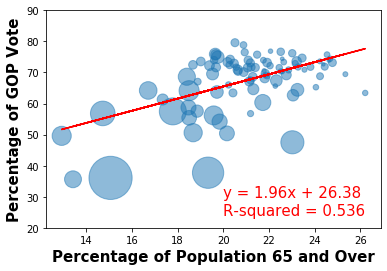

In [94]:
#create a scatterplot for % 65 and older vs %Republican vote
plt.scatter(population_age["% 65 & older"],election["% GOP"],s=pop_reduced*10000, alpha=0.5);
plt.xlabel("Percentage of Population 65 and Over",weight="bold",fontsize=15);
plt.ylabel("Percentage of GOP Vote",weight="bold",fontsize=15);
#plt.title("Percentage of Population 65 & Over vs Percent GOP Vote",weight="bold",fontsize=15);
plt.ylim(20,90)
a=20
b=30
LinearRegression(population_age["% 65 & older"],election["% GOP"])


plt.annotate(f"R-squared = 0.536",(20,24),fontsize=15,color='red');
plt.savefig('over_sixtyfive_GOP.png')

according to:
https://www.census.gov/newsroom/blogs/random-samplings/2017/05/voting_in_america.html![image.png](attachment:image.png)

**Voting Rates**

- 18-29 year olds: 46.1%
- 30-44 year olds: 58.7%
- 45-64 year olds: 66.6%
- 65 years and oldes: 70.9%


In [78]:
path='indiana_ages.csv'
ages_sex=pd.read_csv(path)
ages_sex.head()

,Unnamed: 0,State,County,Female (18-19),Female (20),Female (21),Female (22-24),Female (25-29),Female (30-34),Female (35-39),...,Male (55-59),Male (60-61),Male (62-64),Male (65-66),Male (67-69),Male (70-74),Male (75-79),Male (80-84),Male (85 and over),Pop (18-19)
0,759,Indiana,Adams County,362.0,145.0,250.0,644.0,951.0,971.0,921.0,...,994.0,397.0,572.0,337.0,335.0,536.0,451.0,194.0,277.0,780.0
1,760,Indiana,Allen County,4552.0,2281.0,2508.0,7806.0,12736.0,12169.0,11963.0,...,11663.0,4438.0,5673.0,3468.0,4189.0,4994.0,3427.0,2335.0,2145.0,9334.0
2,761,Indiana,Bartholomew County,733.0,540.0,332.0,1488.0,2671.0,2482.0,2691.0,...,2376.0,1000.0,1428.0,804.0,1094.0,1359.0,943.0,633.0,437.0,1671.0
3,762,Indiana,Benton County,85.0,30.0,55.0,127.0,216.0,258.0,210.0,...,332.0,104.0,158.0,77.0,129.0,179.0,141.0,54.0,39.0,184.0
4,763,Indiana,Blackford County,147.0,29.0,53.0,238.0,331.0,319.0,326.0,...,456.0,160.0,273.0,219.0,187.0,256.0,202.0,106.0,97.0,285.0


In [79]:
total_pop='indiana_pop_age.csv'
indiana_pop_ages=pd.read_csv(total_pop)
indiana_pop_ages.head()

,Unnamed: 0,County,Pop (18-19),Pop (20),Pop (21),Pop (22-24),Pop (25-29),Pop (30-34),Pop (35-39),Pop (40-44),...,Pop (50-54),Pop (55-59),Pop (60-61),Pop (62-64),Pop (65-66),Pop (67-69),Pop (70-74),Pop (75-79),Pop (80-84),Pop (85 and over)
0,759,Adams County,780.0,490.0,535.0,1117.0,1904.0,2064.0,1864.0,1948.0,...,2100.0,2032.0,877.0,1119.0,687.0,868.0,1076.0,881.0,525.0,996.0
1,760,Allen County,9334.0,4671.0,5232.0,15024.0,24951.0,24079.0,23368.0,22458.0,...,24523.0,24219.0,8953.0,11838.0,7299.0,8902.0,11118.0,7948.0,5969.0,6697.0
2,761,Bartholomew County,1671.0,1035.0,804.0,3146.0,5761.0,5299.0,5000.0,5514.0,...,5308.0,5222.0,1790.0,2898.0,1873.0,2127.0,2941.0,2172.0,1500.0,1379.0
3,762,Benton County,184.0,64.0,105.0,319.0,460.0,509.0,437.0,560.0,...,671.0,653.0,222.0,310.0,166.0,249.0,391.0,277.0,157.0,177.0
4,763,Blackford County,285.0,114.0,120.0,448.0,698.0,640.0,588.0,800.0,...,918.0,901.0,324.0,591.0,395.0,391.0,580.0,511.0,289.0,284.0


In [80]:
#Plot Population vs Age categories for Marion vs Daviess counties...is the distribution the same??
#isolate data for Marion County
marion_county_ages=indiana_pop_ages.loc[indiana_pop_ages["County"]=="Marion County"].values.flatten().tolist()
marion_county_ages.pop(0)
marion_county_ages.pop(0)
#marion_county_ages
daviess_county_ages=indiana_pop_ages.loc[indiana_pop_ages["County"]=="Daviess County"].values.flatten().tolist()
daviess_county_ages.pop(0)
daviess_county_ages.pop(0)
#daviess_county_ages

'Daviess County'

In [81]:
categories=["18-19","20","21","22-24","25-29","30-34","35-39","40-44","45-49","50-54","55-59","60-61",
           "62-64","65-66","67-69","70-74","75-79","80-84","85 & over"]


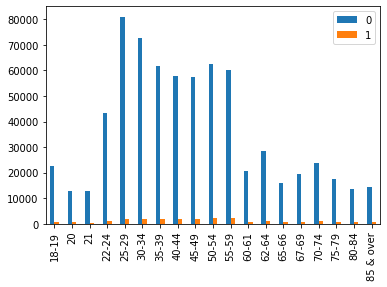

In [82]:
marion_daviess=pd.DataFrame(np.c_[marion_county_ages,daviess_county_ages],index=categories)
marion_daviess.plot.bar();

In [83]:
x_values=np.arange(1,len(marion_county_ages)+1,1)
#plt.()
x_values

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])

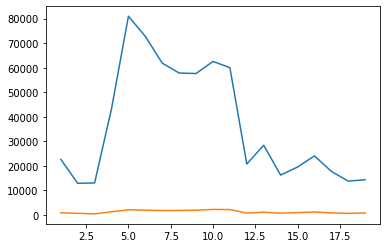

In [84]:
plt.plot(x_values,marion_county_ages);
plt.plot(x_values,daviess_county_ages);

In [85]:
marion_reduced=[]
for item in marion_county_ages:
    reduced=item/25
    marion_reduced.append(reduced)
    
marion_population=election["Total Population"][48]
daviess_population=election["Total Population"][13]


**Total Population**
- Marion County: 932,142
- Daviess County: 32,583

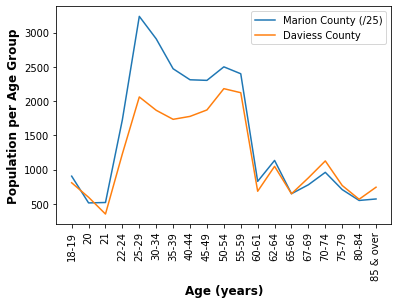

In [86]:
marion_county,=plt.plot(x_values,marion_reduced,label="Marion County (/25)");
daviess_county,=plt.plot(x_values,daviess_county_ages,label="Daviess County");
plt.xticks(x_values, categories, rotation='vertical');
plt.legend(handles=[marion_county, daviess_county], loc="best");
plt.xlabel("Age (years)",weight="bold",fontsize=12);
plt.ylabel("Population per Age Group",weight="bold",fontsize=12);
plt.savefig('marion_daviess_ages.png')

In [101]:
marion_normal=st.normaltest(marion_county_ages)
print(marion_normal)
daviess_normal=st.normaltest(daviess_county_ages)
print(daviess_normal)

NormaltestResult(statistic=5.366893658369441, pvalue=0.06832723549277814)
NormaltestResult(statistic=6.650372192064406, pvalue=0.03596582503327799)


In [109]:
from scipy.stats import kstest
marion_daviess_reduced=st.ks_2samp(marion_reduced,daviess_county_ages)
print(marion_daviess_reduced)

Ks_2sampResult(statistic=0.3684210526315789, pvalue=0.15317317880649114)


In [107]:
from scipy.stats import kstest
marion_daviess=st.ks_2samp(marion_county_ages,daviess_county_ages)
print(marion_daviess)

Ks_2sampResult(statistic=1.0, pvalue=5.6584667505013764e-11)


In [87]:
#isolate data for Marion County
tippecanoe_county_ages=indiana_pop_ages.loc[indiana_pop_ages["County"]=="Tippecanoe County"].values.flatten().tolist()
tippecanoe_county_ages.pop(0)
tippecanoe_county_ages.pop(0)
#tippecanoe_county_ages
monroe_county_ages=indiana_pop_ages.loc[indiana_pop_ages["County"]=="Monroe County"].values.flatten().tolist()
monroe_county_ages.pop(0)
monroe_county_ages.pop(0)
#daviess_county_ages

'Monroe County'

**Total Population**
- Tippecanoe County: 143,292
- Monroe County: 183,397

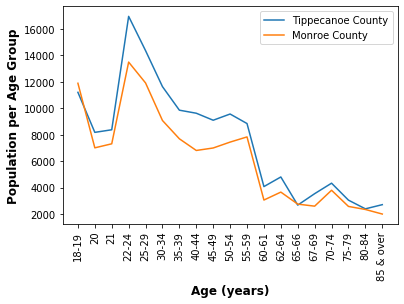

In [96]:
tippecanoe_county,=plt.plot(x_values,tippecanoe_county_ages,label="Tippecanoe County");
monroe_county,=plt.plot(x_values,monroe_county_ages,label="Monroe County");
plt.xticks(x_values, categories, rotation='vertical');
plt.legend(handles=[tippecanoe_county, monroe_county], loc="best");
plt.xlabel("Age (years)",weight="bold",fontsize=12);
plt.ylabel("Population per Age Group",weight="bold",fontsize=12);
plt.savefig('tippecanoe_monroe_ages.png')

In [100]:
tippecanoe_normal=st.normaltest(tippecanoe_county_ages)
print(tippecanoe_normal)
monroe_normal=st.normaltest(monroe_county_ages)
print(monroe_normal)

NormaltestResult(statistic=1.0017174671456575, pvalue=0.606010035043123)
NormaltestResult(statistic=1.4799802677566678, pvalue=0.47711862280819495)


In [108]:
tippecanoe_monroe=st.ks_2samp(tippecanoe_county_ages,monroe_county_ages)
print(tippecanoe_monroe)

Ks_2sampResult(statistic=0.3684210526315789, pvalue=0.15317317880649114)
